# UNDERSTANDING THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
HOME= "/content/drive/My Drive/DeepLearning/Marketing/"

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv(HOME + 'Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()
# 18 features with 8950 points  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe().transpose()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZE AND EXPLORE DATASET

<Axes: >

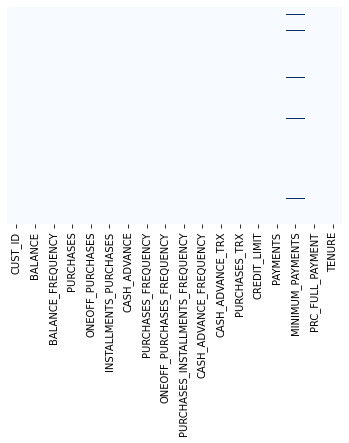

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

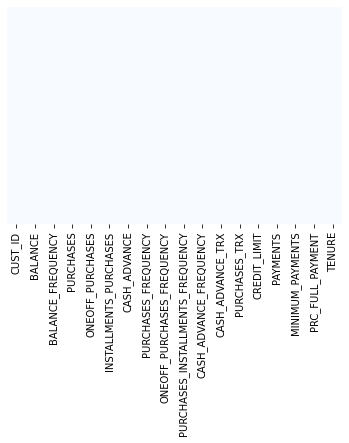

In [ ]:
 sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-26-dc2c71a814e9>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-26-dc2c71a814e9>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

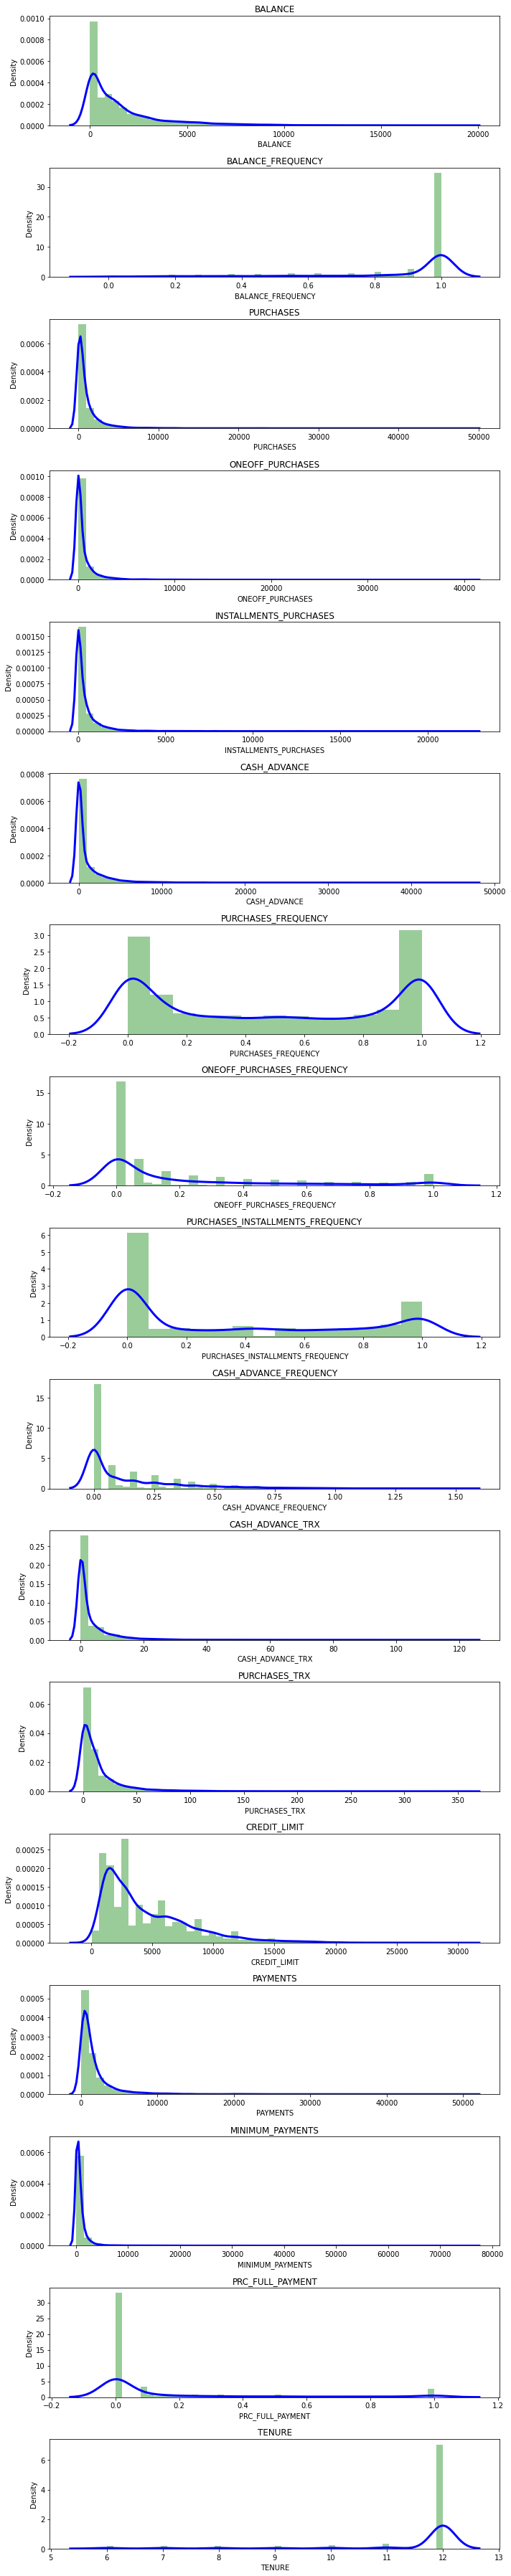

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [ ]:
correlations = creditcard_df.corr()


<Axes: >

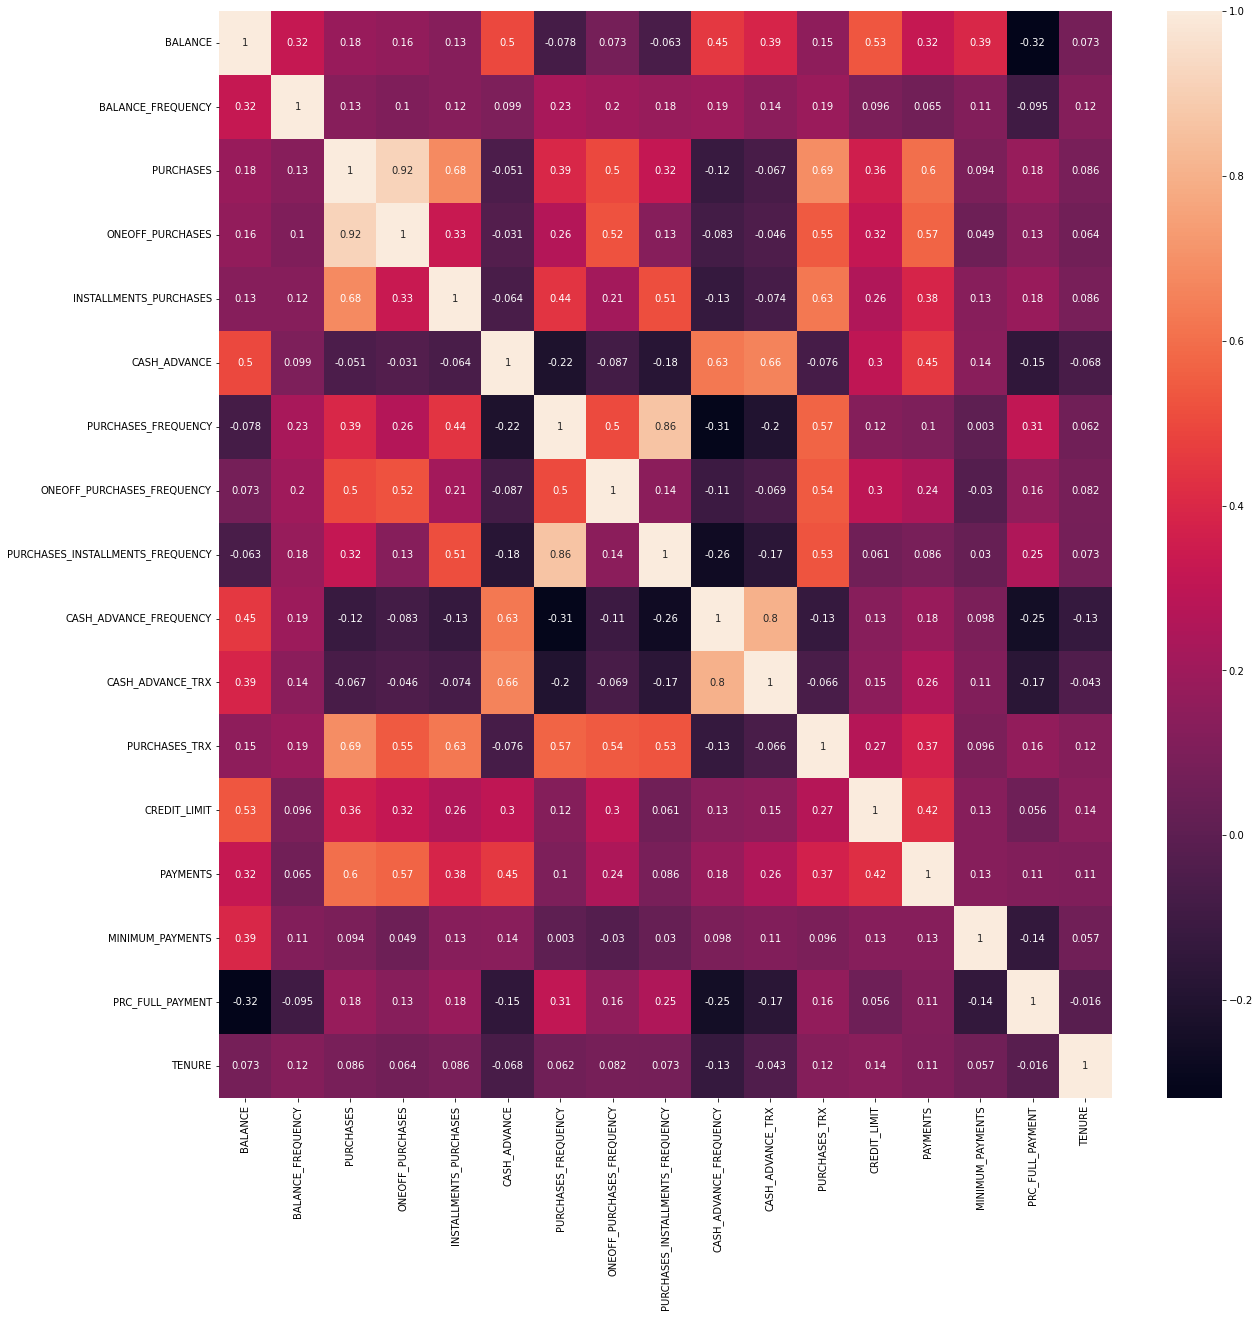

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# FINDING THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

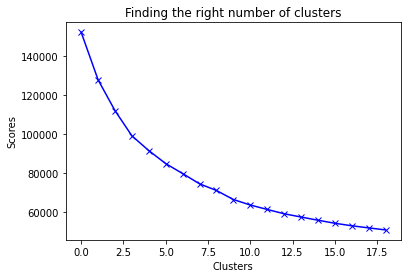

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

#APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700877,-2.137091,-0.309691,-0.234294,-0.301706,-0.322766,-0.552479,-0.440575,-0.438122,-0.521893,-0.376564,-0.418027,-0.174468,-0.201632,-0.256966,0.284727,0.202901
1,-0.357965,0.332433,-0.029606,-0.240593,0.371813,-0.362520,0.997057,-0.380677,1.208315,-0.471903,-0.359553,0.195249,-0.259534,-0.213084,-0.029779,0.313067,0.255413
2,0.007283,0.404203,-0.354191,-0.238906,-0.398458,-0.099919,-0.840969,-0.383085,-0.750801,0.093449,-0.035668,-0.477640,-0.306684,-0.251950,-0.013148,-0.454814,0.273785
3,1.671554,0.390965,-0.220860,-0.157055,-0.233748,1.994510,-0.481496,-0.211898,-0.421828,1.909575,1.914640,-0.270219,1.013879,0.811164,0.547173,-0.391667,0.072107
4,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
5,-0.121858,0.403109,0.564973,0.684705,0.077745,-0.332601,0.998872,1.914235,0.215262,-0.418727,-0.333855,0.659581,0.465822,0.163076,-0.156076,0.460105,0.274536
6,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.658418,0.371014,341.544831,203.556740,138.238767,302.015981,0.268614,0.071026,0.190316,0.030708,0.679054,4.319257,3859.661693,1149.438393,265.357443,0.236993,11.788851
1,819.401487,0.956021,939.952078,193.102063,747.293110,218.649226,0.890518,0.088894,0.844653,0.040712,0.795139,19.562996,3550.158830,1116.287417,794.807299,0.245281,11.859127
2,1579.634093,0.973023,246.471156,195.902503,50.747375,769.335488,0.152829,0.088176,0.066050,0.153844,3.005417,2.837486,3378.608403,1003.773299,833.565951,0.020689,11.883713
3,5043.673813,0.969887,531.334700,331.757486,199.692356,5161.451433,0.297103,0.139244,0.196792,0.517270,16.314836,7.993205,8183.357356,4081.385540,2139.369978,0.039159,11.613817
4,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
5,1310.838700,0.972764,2210.278758,1728.907721,481.371037,281.391112,0.891246,0.773511,0.449988,0.051353,0.970509,31.104558,6189.300512,2205.232650,500.477164,0.288287,11.884718
6,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 5, ..., 7, 7, 7], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


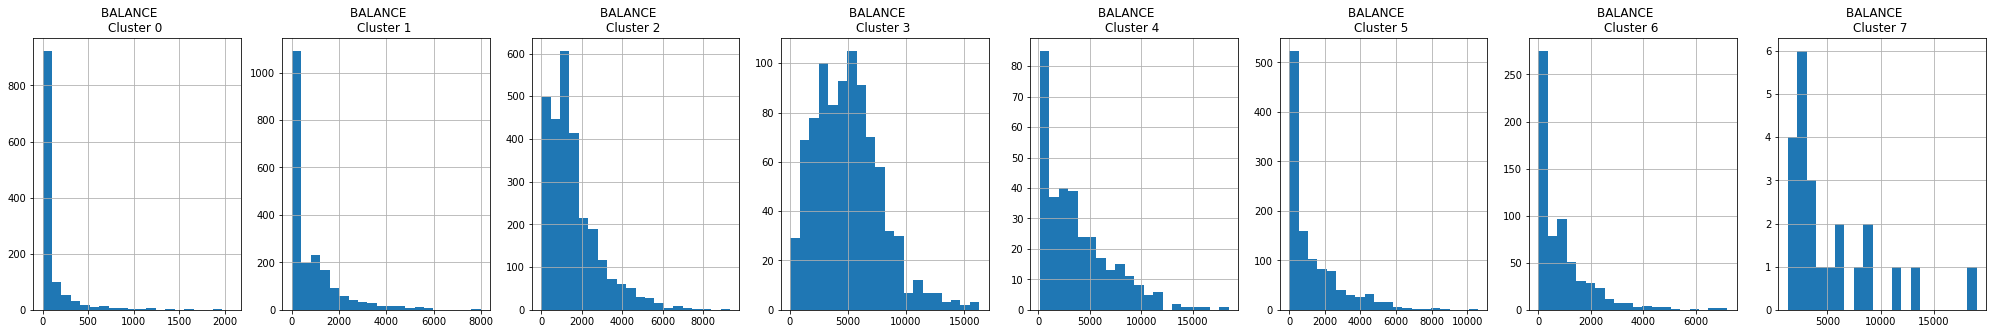

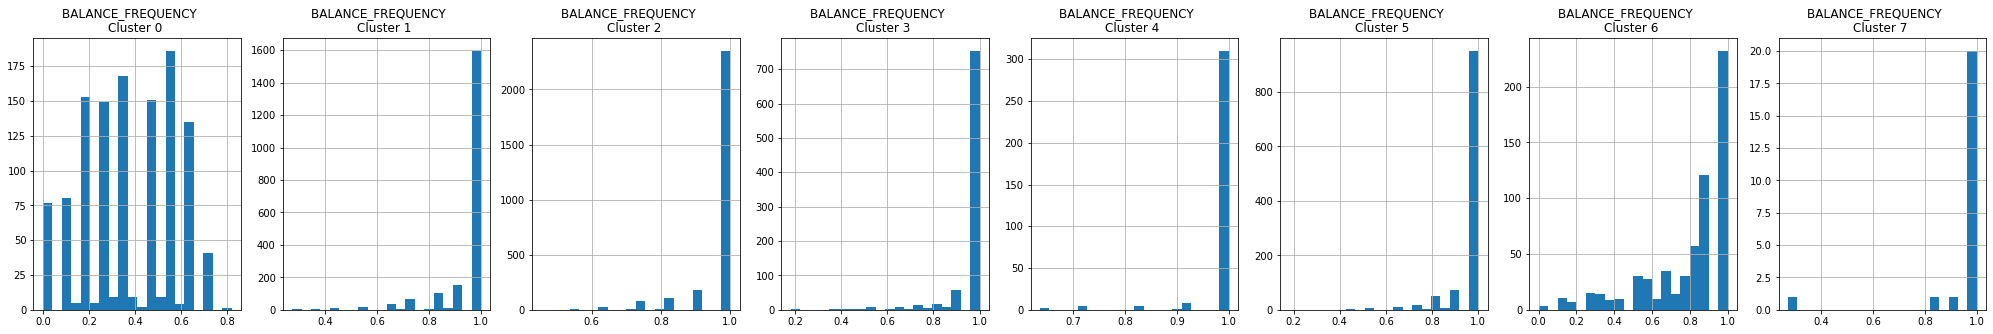

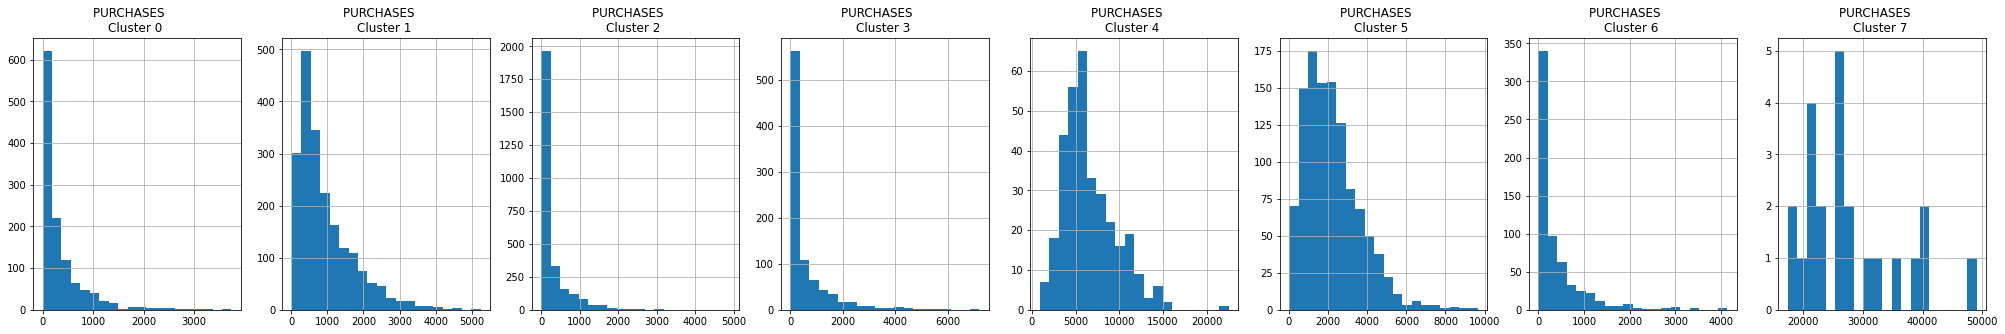

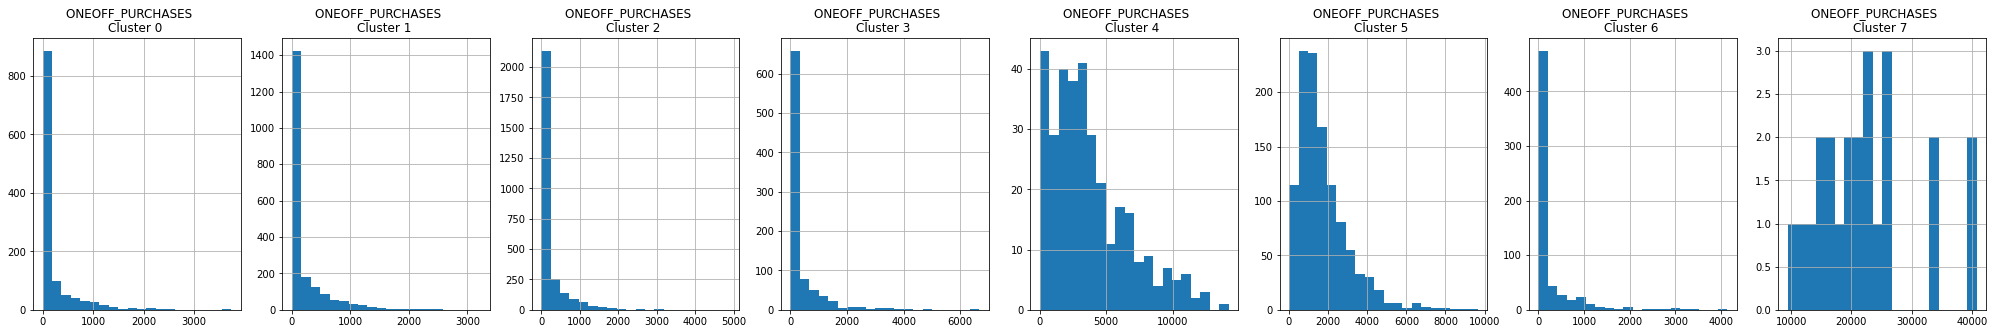

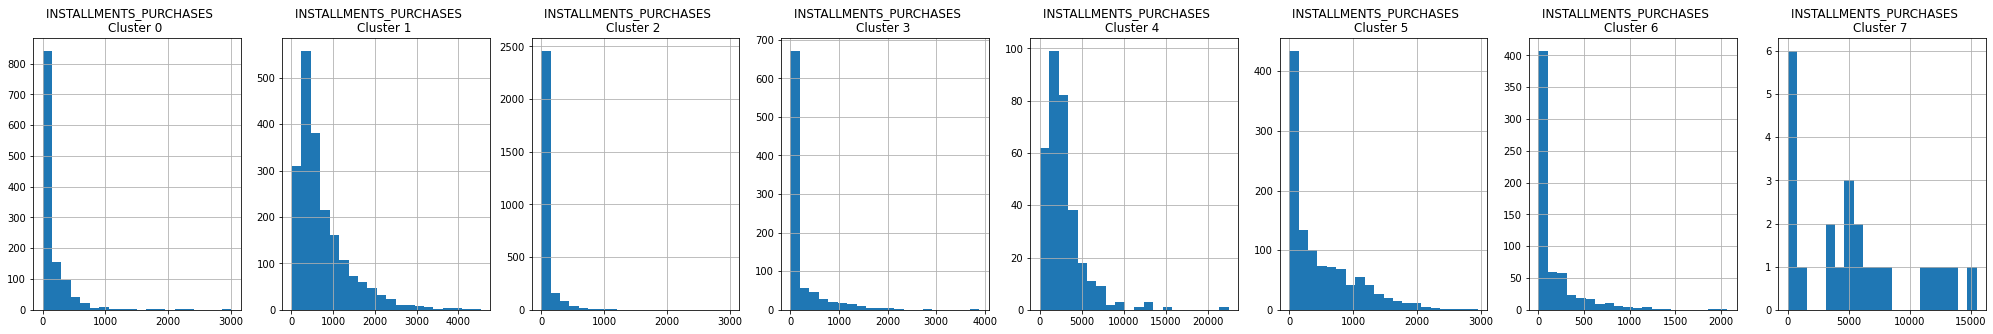

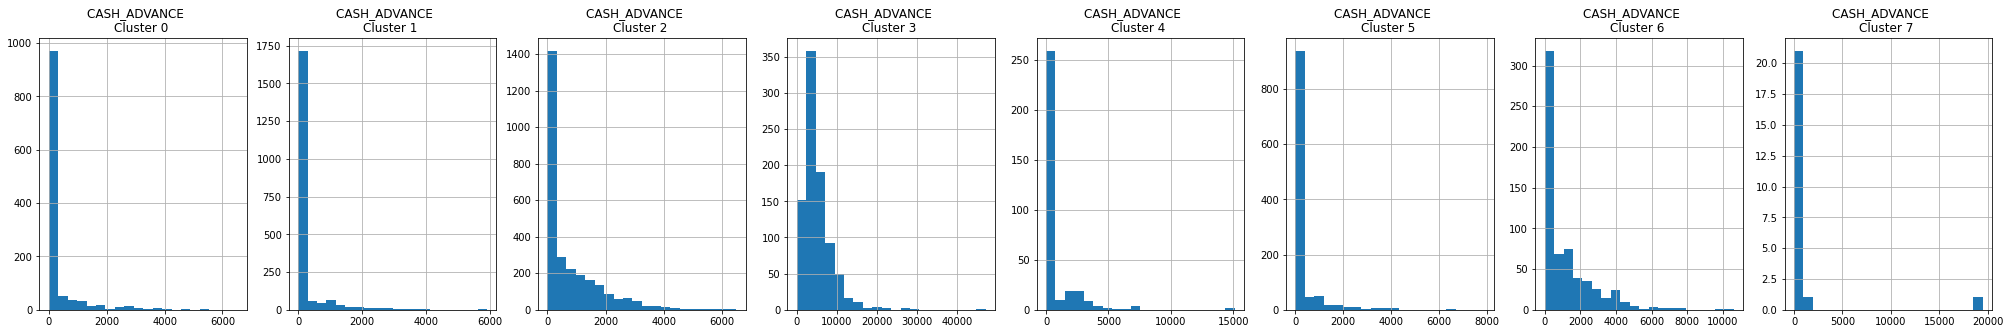

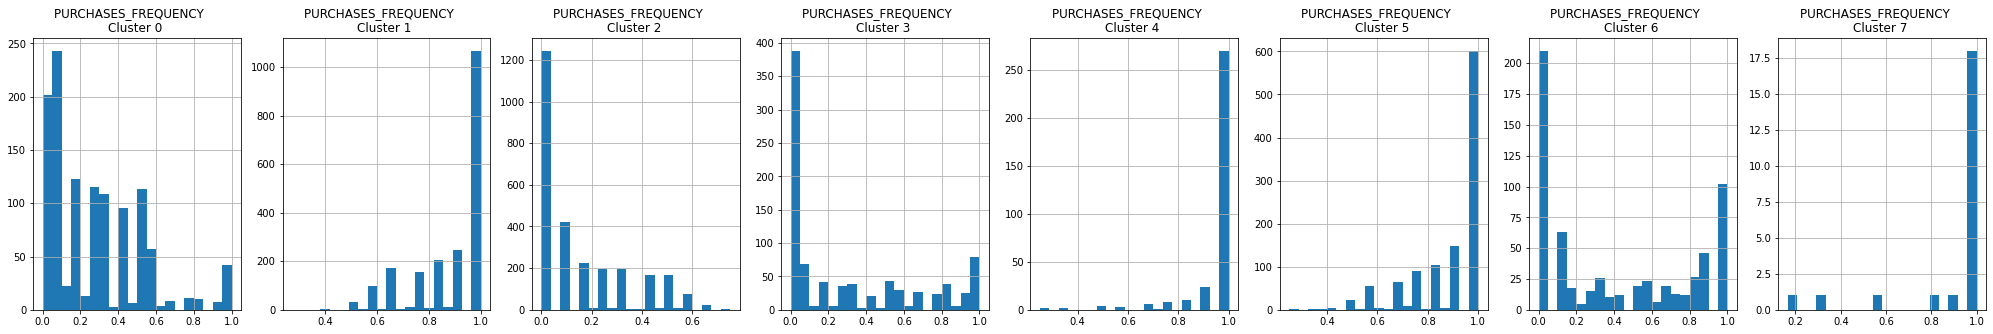

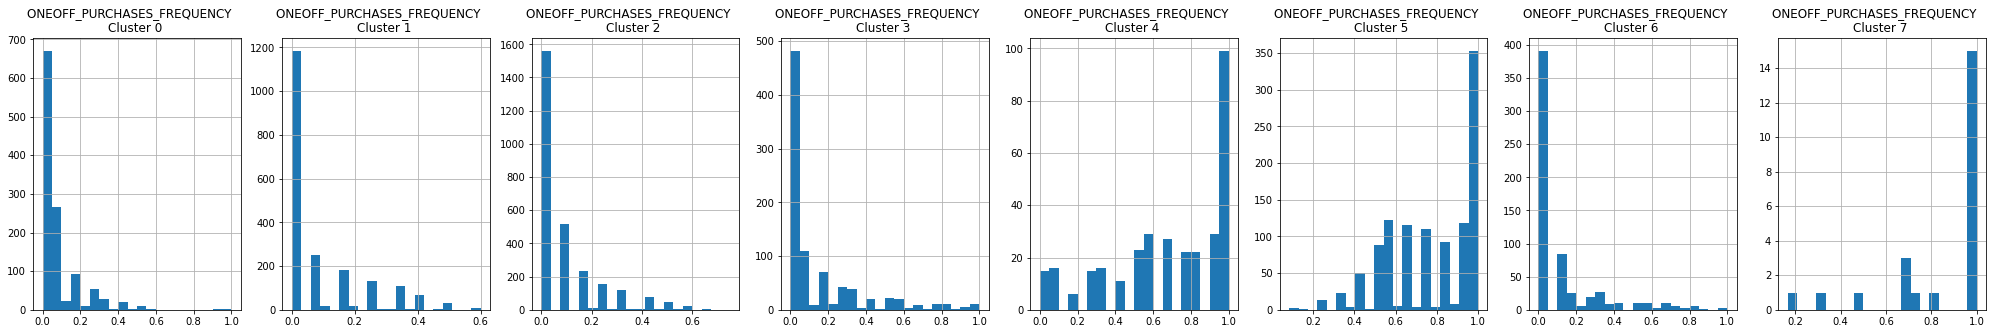

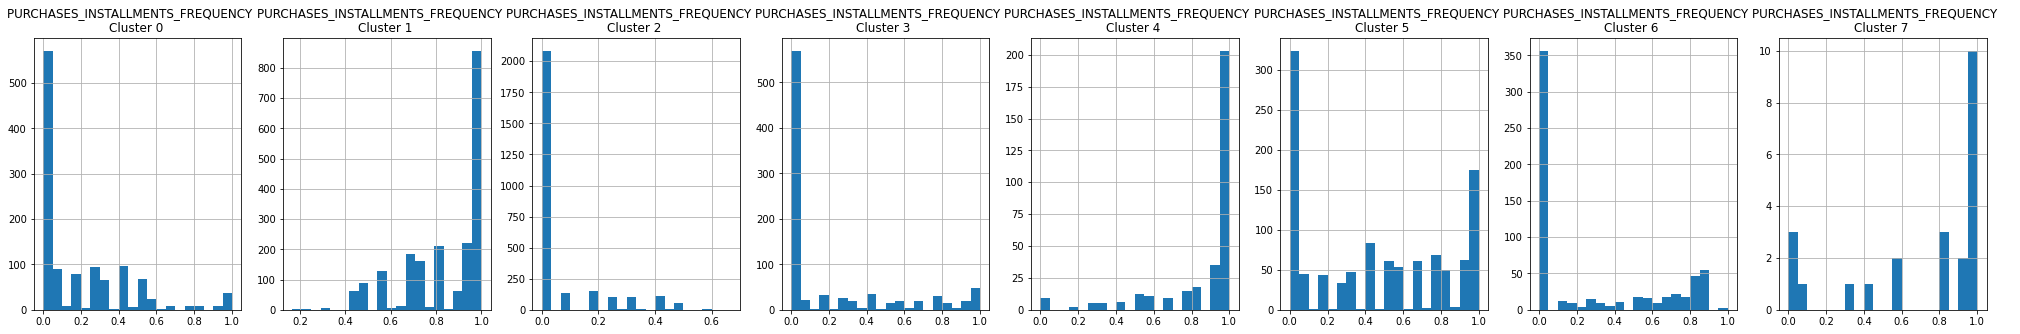

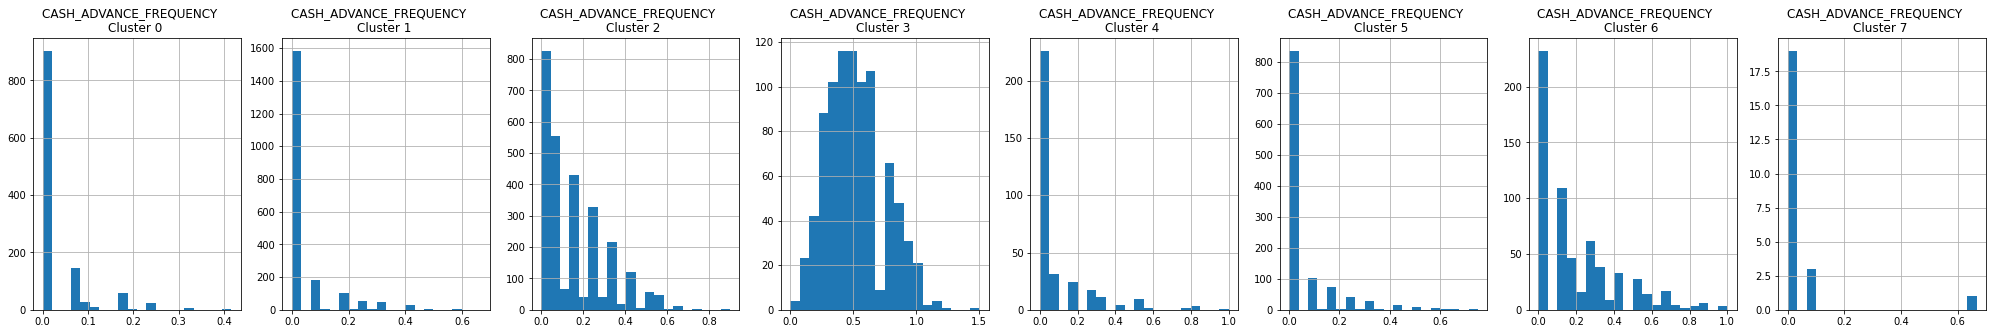

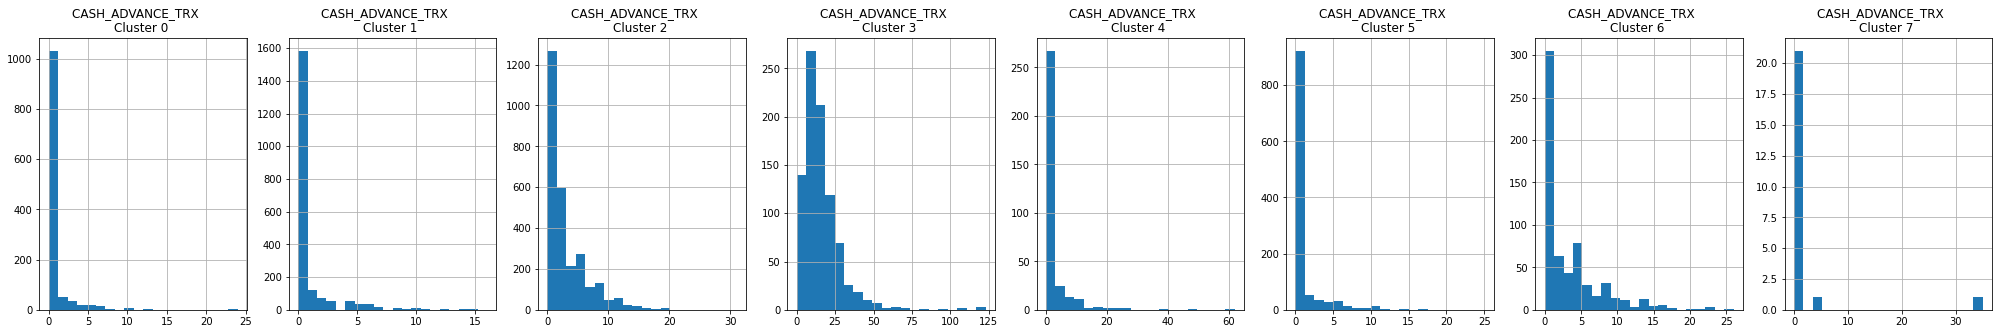

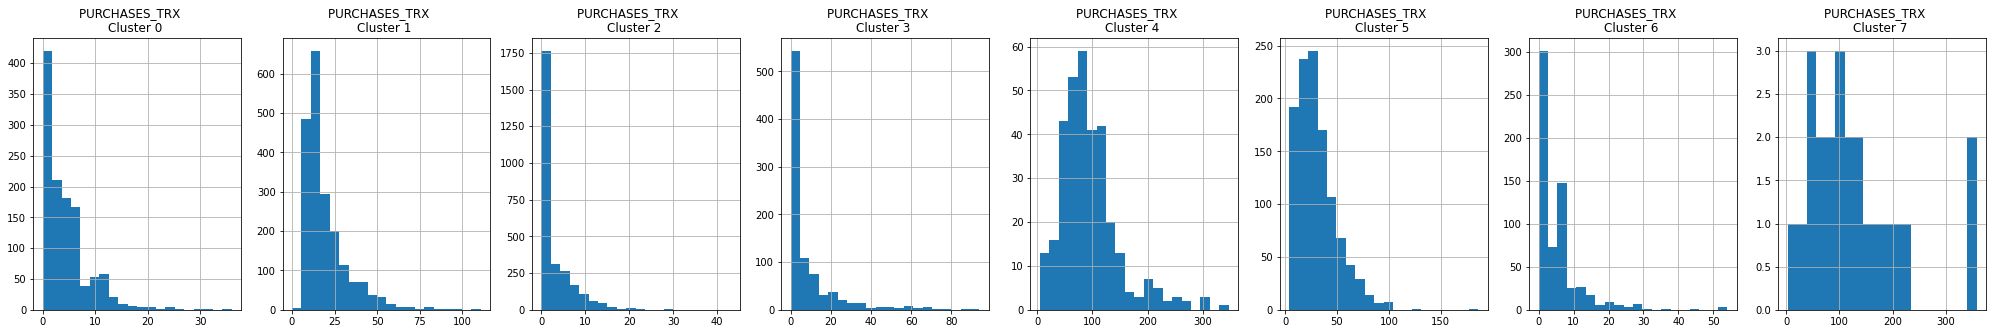

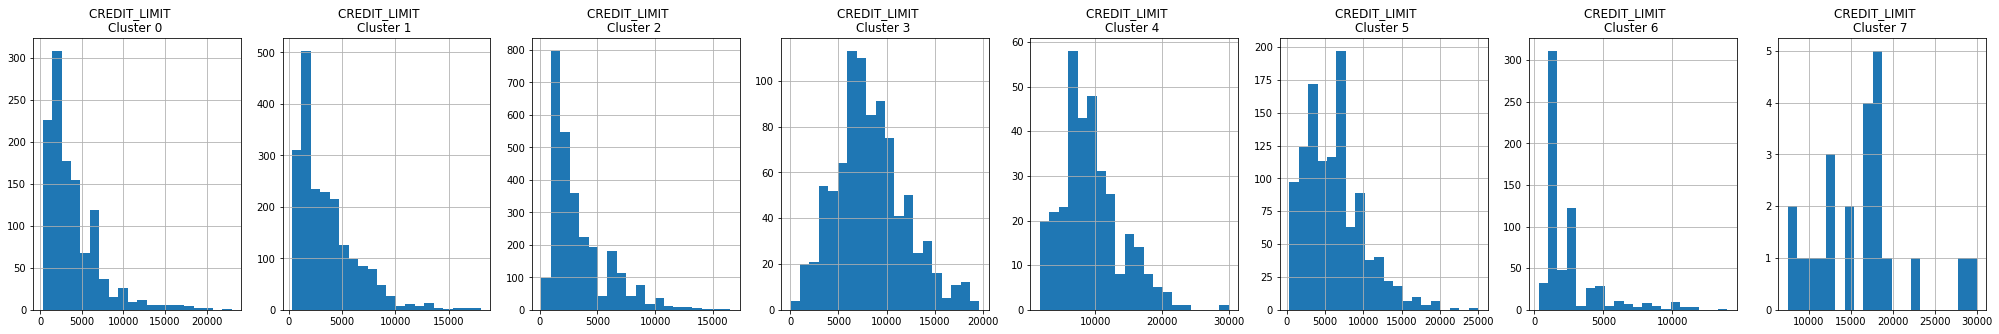

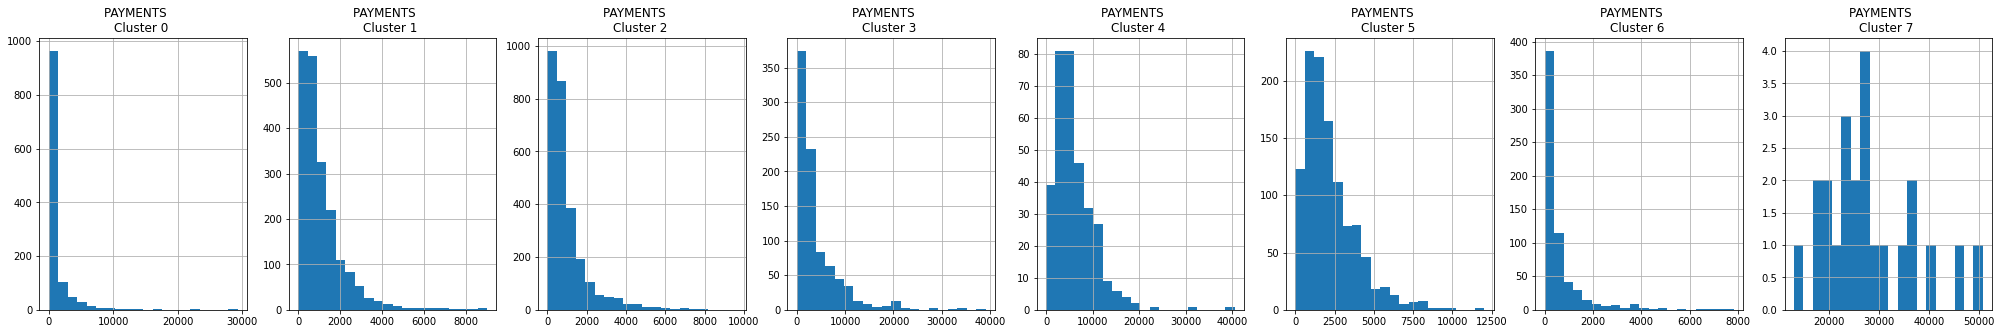

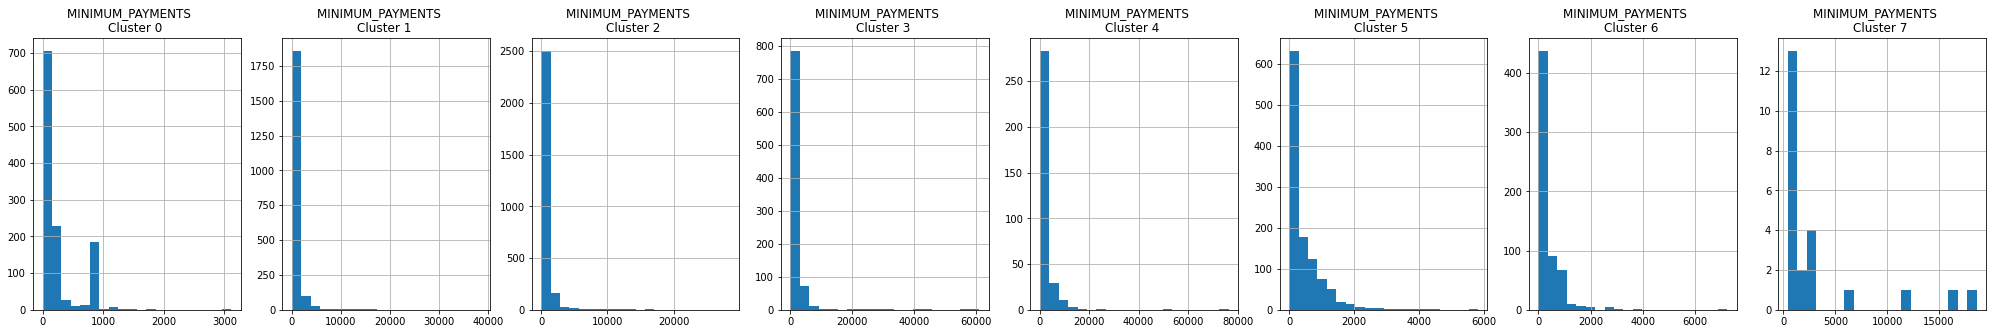

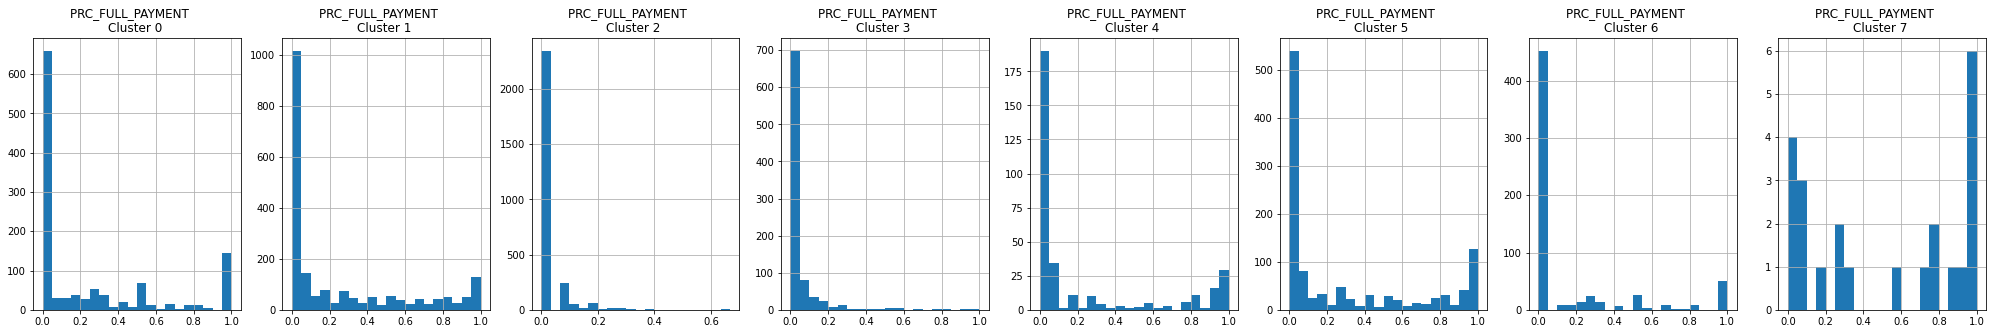

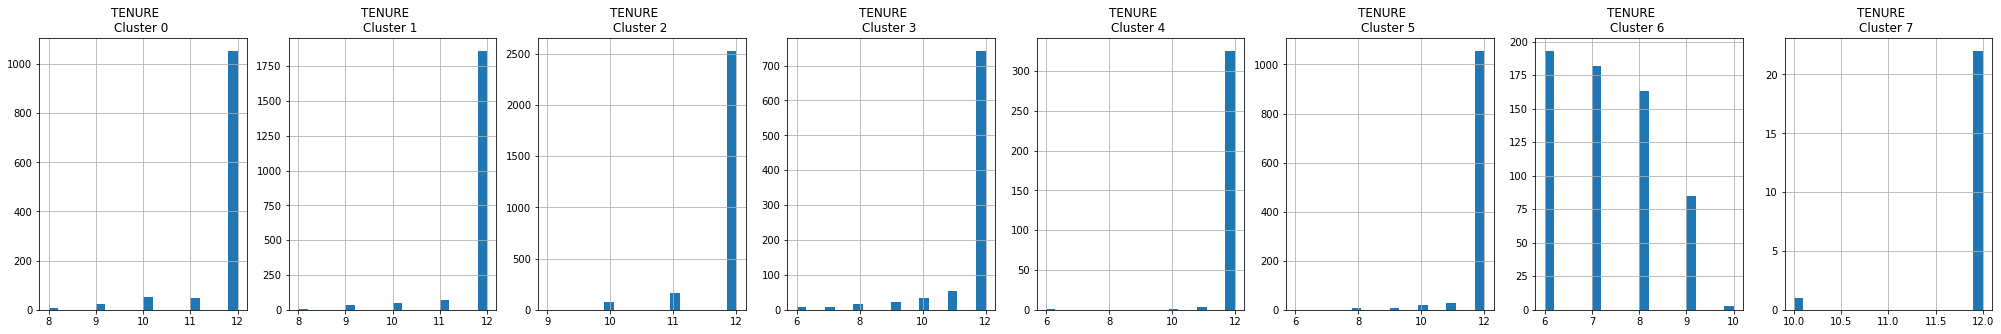

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221521, -1.0764541 ],
       [-1.13826909,  2.50645281],
       [ 0.96965043, -0.38347821],
       ...,
       [-0.92620151, -1.81078822],
       [-2.33654188, -0.65798057],
       [-0.55643319, -0.4004601 ]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682215,-1.076454
1,-1.138269,2.506453
2,0.969650,-0.383478
3,-0.873631,0.043174
4,-1.599427,-0.688587


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682215,-1.076454,2
1,-1.138269,2.506453,3
2,0.969650,-0.383478,5
3,-0.873631,0.043174,2
4,-1.599427,-0.688587,2


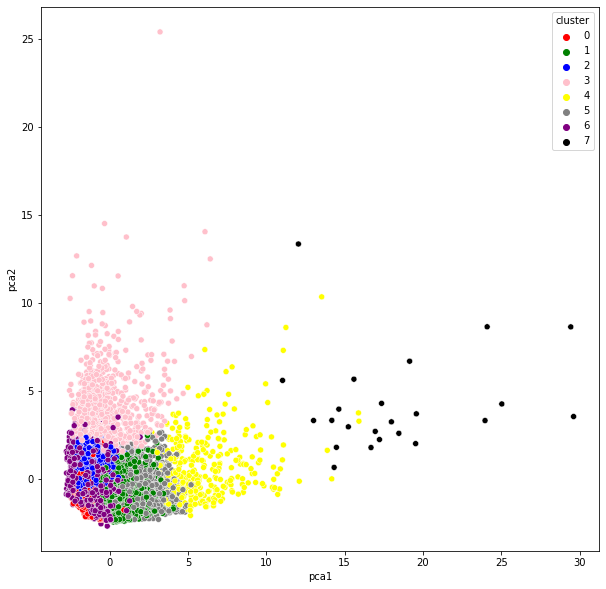

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 46ms/step - loss: 0.5373
Epoch 2/25
70/70 [==============================] - 3s 36ms/step - loss: 0.2977
Epoch 3/25
70/70 [==============================] - 3s 36ms/step - loss: 0.2246
Epoch 4/25
70/70 [==============================] - 3s 36ms/step - loss: 0.1927
Epoch 5/25
70/70 [==============================] - 3s 45ms/step - loss: 0.1585
Epoch 6/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1353
Epoch 7/25
70/70 [==============================] - 2s 36ms/step - loss: 0.1368
Epoch 8/25
70/70 [==============================] - 2s 36ms/step - loss: 0.1250
Epoch 9/25
70/70 [==============================] - 2s 36ms/step - loss: 0.1146
Epoch 10/25
70/70 [==============================] - 3s 47ms/step - loss: 0.1100
Epoch 11/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1025
Epoch 12/25
70/70 [==============================] - 2s 35ms/step - loss: 0.0937
Epoch 13/25
70/70 [==================

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 3ms/step


In [ ]:
pred.shape

(8950, 10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

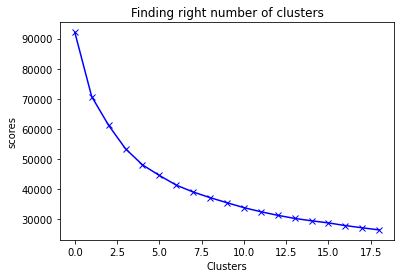

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

<ipython-input-55-a03cdc235775>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-55-a03cdc235775>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


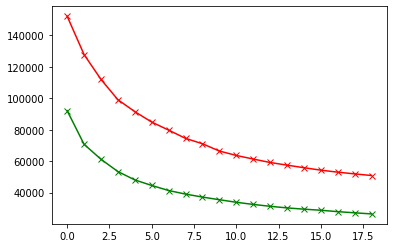

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.774114,-0.059755
1,1.645104,-2.000202
2,0.064331,1.016973
3,-0.376987,-0.296764
4,-1.841403,0.130731


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.774114,-0.059755,1
1,1.645104,-2.000202,0
2,0.064331,1.016973,1
3,-0.376987,-0.296764,1
4,-1.841403,0.130731,1


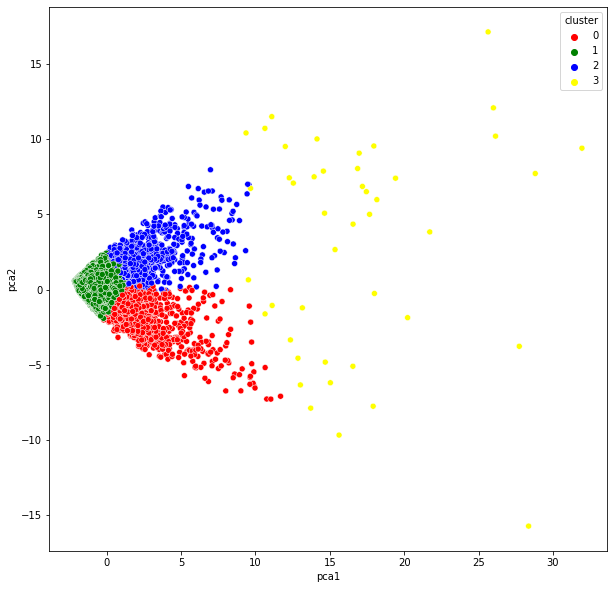

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()